In [126]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
sns.set_style("whitegrid")

# Load data
data = np.load('md_ir_spectrum.npz')
print(f"Data keys: {list(data.keys())}")

# # Setup figure
# fig, axes = plt.subplots(2, 1, figsize=(14, 10))




Data keys: ['frequencies', 'intensities', 'intensity_physnet', 'intensity_dcmnet', 'autocorrelation', 'times']


Data keys: ['frequencies', 'intensities', 'intensity_physnet', 'intensity_dcmnet', 'autocorrelation', 'times']
array[100001] 0.8Mb x∈[0., 1.000] μ=0.000 σ=0.007
array[100001] 0.8Mb x∈[0., 1.000] μ=0.000 σ=0.007
array[100001] 0.8Mb x∈[0., 6.671e+04] μ=3.336e+04 σ=1.926e+04
array[99992] 0.8Mb x∈[0.150, 3.335e+03] μ=1.668e+03 σ=962.840
array[99992] 0.8Mb x∈[3.021e-14, 0.571] μ=0.000 σ=0.005
array[99992] 0.8Mb x∈[2.463e-14, 0.571] μ=0.000 σ=0.005


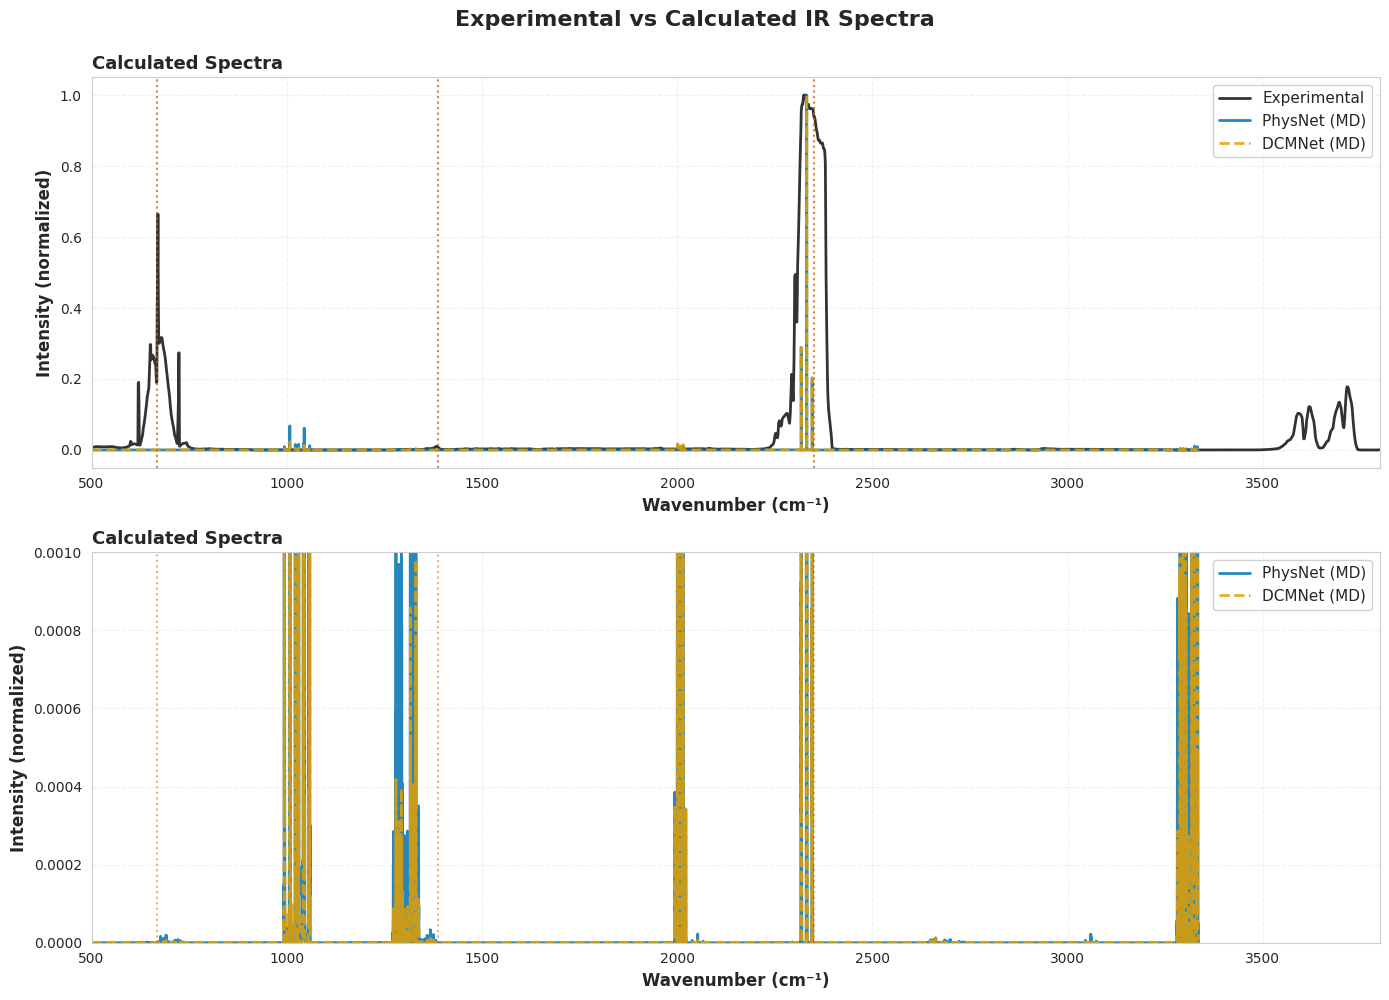


✅ DONE


In [ ]:
# Okabe-Ito colorblind-friendly palette
colors = {
    'orange': '#E69F00',
    'sky_blue': '#56B4E9', 
    'bluish_green': '#009E73',
    'yellow': '#F0E442',
    'blue': '#0072B2',
    'vermillion': '#D55E00',
    'reddish_purple': '#CC79A7',
    'black': '#000000'
}

def rolling_average(data, window_size=10):
    """Apply rolling average smoothing"""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Load MD IR spectrum data
data = np.load('md_ir_spectrum.npz')
print(f"Data keys: {list(data.keys())}")
import lovely_numpy as lnp
print(lnp.lovely(data['intensity_physnet']))
print(lnp.lovely(data['intensity_dcmnet']))
print(lnp.lovely(data['frequencies']))

# # Zero out low-frequency noise
data['intensity_physnet'][0] = 0
data['intensity_dcmnet'][0] = 0

# Apply smoothing
freqs = rolling_average(data['frequencies'])/20
int_phys = rolling_average(data['intensity_physnet'])
int_dcm = rolling_average(data['intensity_dcmnet'])
import lovely_numpy as lnp
print(lnp.lovely(freqs))
print(lnp.lovely(int_phys))
print(lnp.lovely(int_dcm))
# Experimental CO2 frequencies (fundamental + combination/overtone bands)
exp_co2 = [
    ('ν₂ Bending', 667.4),           # Fundamental bend
    ('ν₁ Symmetric Stretch', 1388.2), # Fundamental symmetric stretch
    ('ν₃ Asymmetric Stretch', 2349.2),# Fundamental asymmetric stretch
    ('2ν₂ + ν₃ Combination', 3715.0)  # Combination band
]

exp_data = np.load('../experimental_co2_ir.npz', allow_pickle=True)
exp_freq = exp_data['wavenumbers']
exp_abs = exp_data['absorbance']

fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('Experimental vs Calculated IR Spectra', fontsize=16, weight='bold', y=0.995)

# Plot 1: Experimental
ax = axes[0]
ax.plot(exp_freq, exp_abs/exp_abs.max(), 
        color=colors['black'], lw=2, label='Experimental', alpha=0.8)
for name, freq in exp_co2:
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)
ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Absorbance (normalized)', fontsize=12, weight='bold')
ax.set_title('Experimental Spectrum', fontsize=13, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(500, 3800)

mask_calc = (freqs > 500) & (freqs < 5000)

# Plot 2: Calculated (both models)
for ax in axes:
    ax.plot(freqs[mask_calc], int_phys[mask_calc]/int_phys[mask_calc].max(),
            color=colors['blue'], lw=2, label='PhysNet (MD)', alpha=0.85)
    ax.plot(freqs[mask_calc], int_dcm[mask_calc]/int_dcm[mask_calc].max(),
            color=colors['orange'], lw=2, ls='--', label='DCMNet (MD)', alpha=0.85)
    for name, freq in exp_co2:
        ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
    ax.set_title('Calculated Spectra', fontsize=13, weight='bold', loc='left')
    ax.legend(fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim(500, 3800)


ax.set_xlim(500, 3800)
ax.set_ylim(0, 0.01)
plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"✅ DONE")
print(f"{'='*70}")



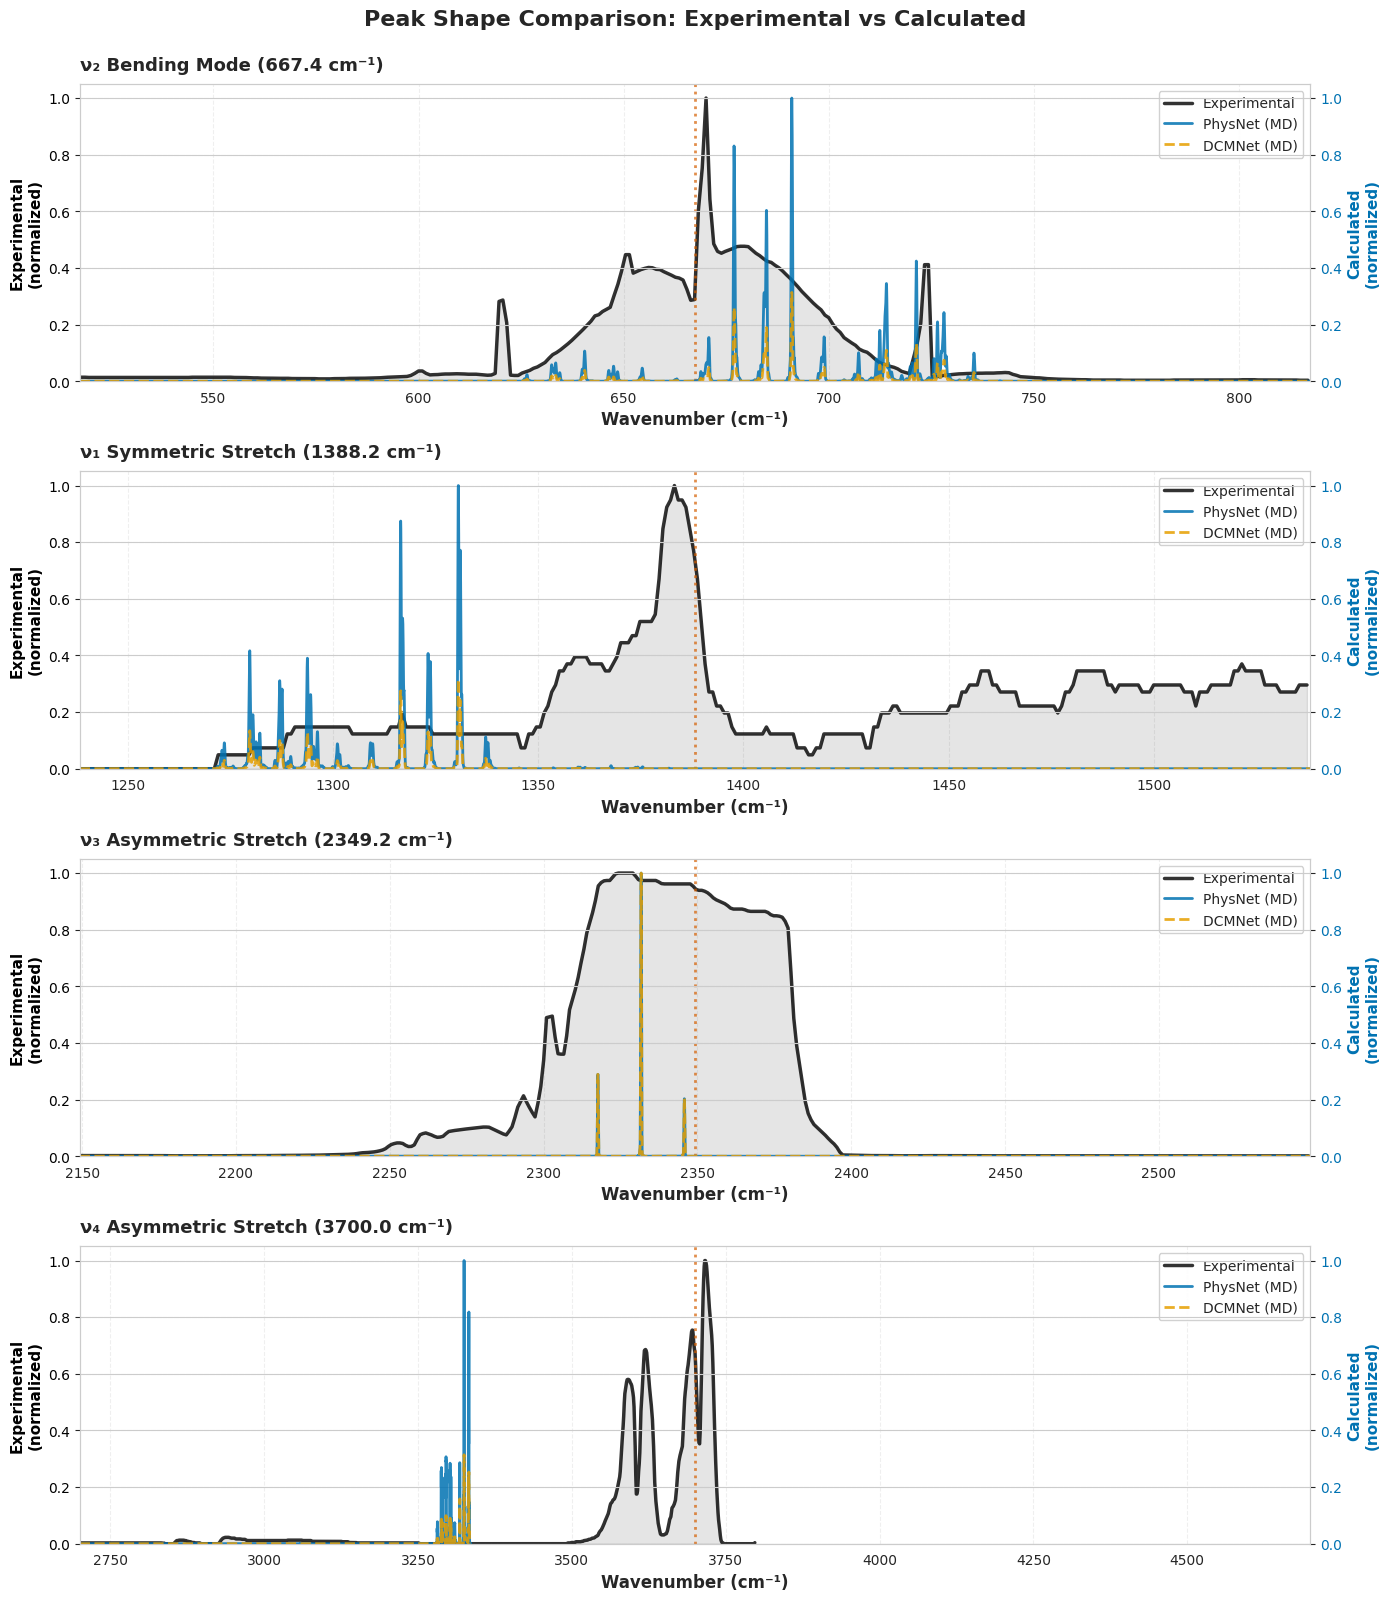


PEAK SHAPE COMPARISON

💡 Each panel shows:
   • Left axis (black): Experimental spectrum (normalized per region)
   • Right axis (blue/orange): Calculated spectra (normalized per region)
   • Red dotted line: Expected peak position

📊 Analysis:

  ν₂ Bending Mode (667.4 cm⁻¹):
    PhysNet peak at:    691.0 cm⁻¹  (Δ =  +23.6 cm⁻¹)
    DCMNet peak at:     691.0 cm⁻¹  (Δ =  +23.6 cm⁻¹)
    Max intensity:    1.123724e-05 (PhysNet), 3.522128e-06 (DCMNet)

  ν₁ Symmetric Stretch (1388.2 cm⁻¹):
    PhysNet peak at:   1330.5 cm⁻¹  (Δ =  -57.7 cm⁻¹)
    DCMNet peak at:    1330.5 cm⁻¹  (Δ =  -57.7 cm⁻¹)
    Max intensity:    1.779598e-03 (PhysNet), 5.600043e-04 (DCMNet)

  ν₃ Asymmetric Stretch (2349.2 cm⁻¹):
    PhysNet peak at:   2331.7 cm⁻¹  (Δ =  -17.5 cm⁻¹)
    DCMNet peak at:    2331.7 cm⁻¹  (Δ =  -17.5 cm⁻¹)
    Max intensity:    5.705490e-01 (PhysNet), 5.705312e-01 (DCMNet)

  ν₄ Asymmetric Stretch (3700.0 cm⁻¹):
    PhysNet peak at:   3324.7 cm⁻¹  (Δ = -375.3 cm⁻¹)
    DCMNet peak at: 

In [ ]:
# ===========================================================================
# Figure 3: Automated zoom-in comparison for each CO2 peak
# ===========================================================================

# Define regions of interest around experimental CO2 peaks (frequency, window_size, name)
peak_regions = [
    (667.4, 150, 'ν₂ Bending'),               # Fundamental bend
    (1388.2, 150, 'ν₁ Symmetric Stretch'),    # Fundamental symmetric stretch
    (2349.2, 200, 'ν₃ Asymmetric Stretch'),   # Fundamental asymmetric stretch
    (3715.0, 250, '2ν₂ + ν₃ Combination')     # Combination band
]

fig, axes = plt.subplots(len(peak_regions), 1, figsize=(14, 4*len(peak_regions)))
fig.suptitle('Peak Shape Comparison: Experimental vs Calculated', 
             fontsize=16, weight='bold', y=0.998)

for idx, (peak_freq, window, name) in enumerate(peak_regions):
    ax = axes[idx]
    
    # Define frequency window
    freq_min = peak_freq - window
    freq_max = peak_freq + window
    
    # Mask experimental data
    exp_mask = (exp_freq >= freq_min) & (exp_freq <= freq_max)
    exp_f = exp_freq[exp_mask]
    exp_a = exp_abs[exp_mask]
    
    # Mask calculated data
    calc_mask = (freqs >= freq_min) & (freqs <= freq_max)
    calc_f = freqs[calc_mask]
    calc_p = int_phys[calc_mask]
    calc_d = int_dcm[calc_mask]
    
    # Create dual y-axis
    ax2 = ax.twinx()
    
    # Plot experimental on left axis (normalized in this region)
    if len(exp_f) > 0 and exp_a.max() > 0:
        ax.plot(exp_f, exp_a / exp_a.max(), 
                color=colors['black'], lw=2.5, label='Experimental', alpha=0.8, zorder=3)
        ax.fill_between(exp_f, 0, exp_a / exp_a.max(), 
                        color=colors['black'], alpha=0.1, zorder=1)
    
    # Plot calculated on right axis (normalized in this region)
    if len(calc_f) > 0:
        calc_max = max(calc_p.max(), calc_d.max())
        if calc_max > 0:
            ax2.plot(calc_f, calc_p / calc_max, 
                    color=colors['blue'], lw=2, label='PhysNet (MD)', alpha=0.85, zorder=2)
            ax2.plot(calc_f, calc_d / calc_max, 
                    color=colors['orange'], lw=2, ls='--', label='DCMNet (MD)', alpha=0.85, zorder=2)
    
    # Mark the experimental peak position
    ax.axvline(peak_freq, color=colors['vermillion'], ls=':', lw=2, alpha=0.7, zorder=4)
    
    # Styling
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Experimental\n(normalized)', fontsize=11, weight='bold', color=colors['black'])
    ax2.set_ylabel('Calculated\n(normalized)', fontsize=11, weight='bold', color=colors['blue'])
    
    ax.set_title(f'{name} ({peak_freq:.1f} cm⁻¹)', fontsize=13, weight='bold', loc='left', pad=10)
    
    ax.tick_params(axis='y', labelcolor=colors['black'])
    ax2.tick_params(axis='y', labelcolor=colors['blue'])
    
    ax.set_xlim(freq_min, freq_max)
    ax.set_ylim(0, 1.05)
    ax2.set_ylim(0, 1.05)
    
    ax.grid(True, alpha=0.3, ls='--', zorder=0)
    
    # Combined legend
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, 
             loc='upper right', fontsize=10, framealpha=0.9)

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"PEAK SHAPE COMPARISON")
print(f"{'='*70}")
print(f"\n💡 Each panel shows:")
print(f"   • Left axis (black): Experimental spectrum (normalized per region)")
print(f"   • Right axis (blue/orange): Calculated spectra (normalized per region)")
print(f"   • Red dotted line: Expected peak position")
print(f"\n📊 Analysis:")
for peak_freq, window, name in peak_regions:
    freq_min = peak_freq - window
    freq_max = peak_freq + window
    
    # Count calculated peaks in region
    calc_mask = (freqs >= freq_min) & (freqs <= freq_max)
    calc_p = int_phys[calc_mask]
    calc_d = int_dcm[calc_mask]
    
    if len(calc_p) > 0 and calc_p.max() > 0:
        # Find peak position
        peak_idx_p = np.argmax(calc_p)
        peak_idx_d = np.argmax(calc_d)
        peak_pos_p = freqs[calc_mask][peak_idx_p]
        peak_pos_d = freqs[calc_mask][peak_idx_d]
        
        print(f"\n  {name} ({peak_freq:.1f} cm⁻¹):")
        print(f"    PhysNet peak at:  {peak_pos_p:7.1f} cm⁻¹  (Δ = {peak_pos_p - peak_freq:+6.1f} cm⁻¹)")
        print(f"    DCMNet peak at:   {peak_pos_d:7.1f} cm⁻¹  (Δ = {peak_pos_d - peak_freq:+6.1f} cm⁻¹)")
        print(f"    Max intensity:    {calc_p.max():.6e} (PhysNet), {calc_d.max():.6e} (DCMNet)")
    else:
        print(f"\n  {name} ({peak_freq:.1f} cm⁻¹): No calculated peaks detected")

print(f"\n{'='*70}")


In [189]:
# 


INDIVIDUAL PEAK FITTING

📊 Fitting ν₂ Bending (667.4 cm⁻¹)...
  PhysNet...
    shift=-53.7 cm⁻¹, FWHM=10.0 cm⁻¹, scale=8.15e+07, MSE=0.2274
  DCMNet...
    shift=-52.2 cm⁻¹, FWHM=9.3 cm⁻¹, scale=1.77e+08, MSE=0.1550

📊 Fitting ν₁ Symmetric Stretch (1388.2 cm⁻¹)...
  PhysNet...
    shift=+0.0 cm⁻¹, FWHM=23.6 cm⁻¹, scale=1.34e+06, MSE=0.0000
  DCMNet...
    shift=+0.0 cm⁻¹, FWHM=23.6 cm⁻¹, scale=3.92e+06, MSE=0.0000

📊 Fitting ν₃ Asymmetric Stretch (2349.2 cm⁻¹)...
  PhysNet...
    shift=+0.2 cm⁻¹, FWHM=2.4 cm⁻¹, scale=7.96e+10, MSE=0.6383
  DCMNet...
    shift=-0.2 cm⁻¹, FWHM=2.4 cm⁻¹, scale=2.41e+11, MSE=0.7282

📊 Fitting 2ν₂ + ν₃ Combination (3715.0 cm⁻¹)...
  PhysNet...
    shift=-1.1 cm⁻¹, FWHM=7.0 cm⁻¹, scale=1.99e+09, MSE=0.0107
  DCMNet...
    shift=-1.4 cm⁻¹, FWHM=2.4 cm⁻¹, scale=1.91e+10, MSE=0.0110


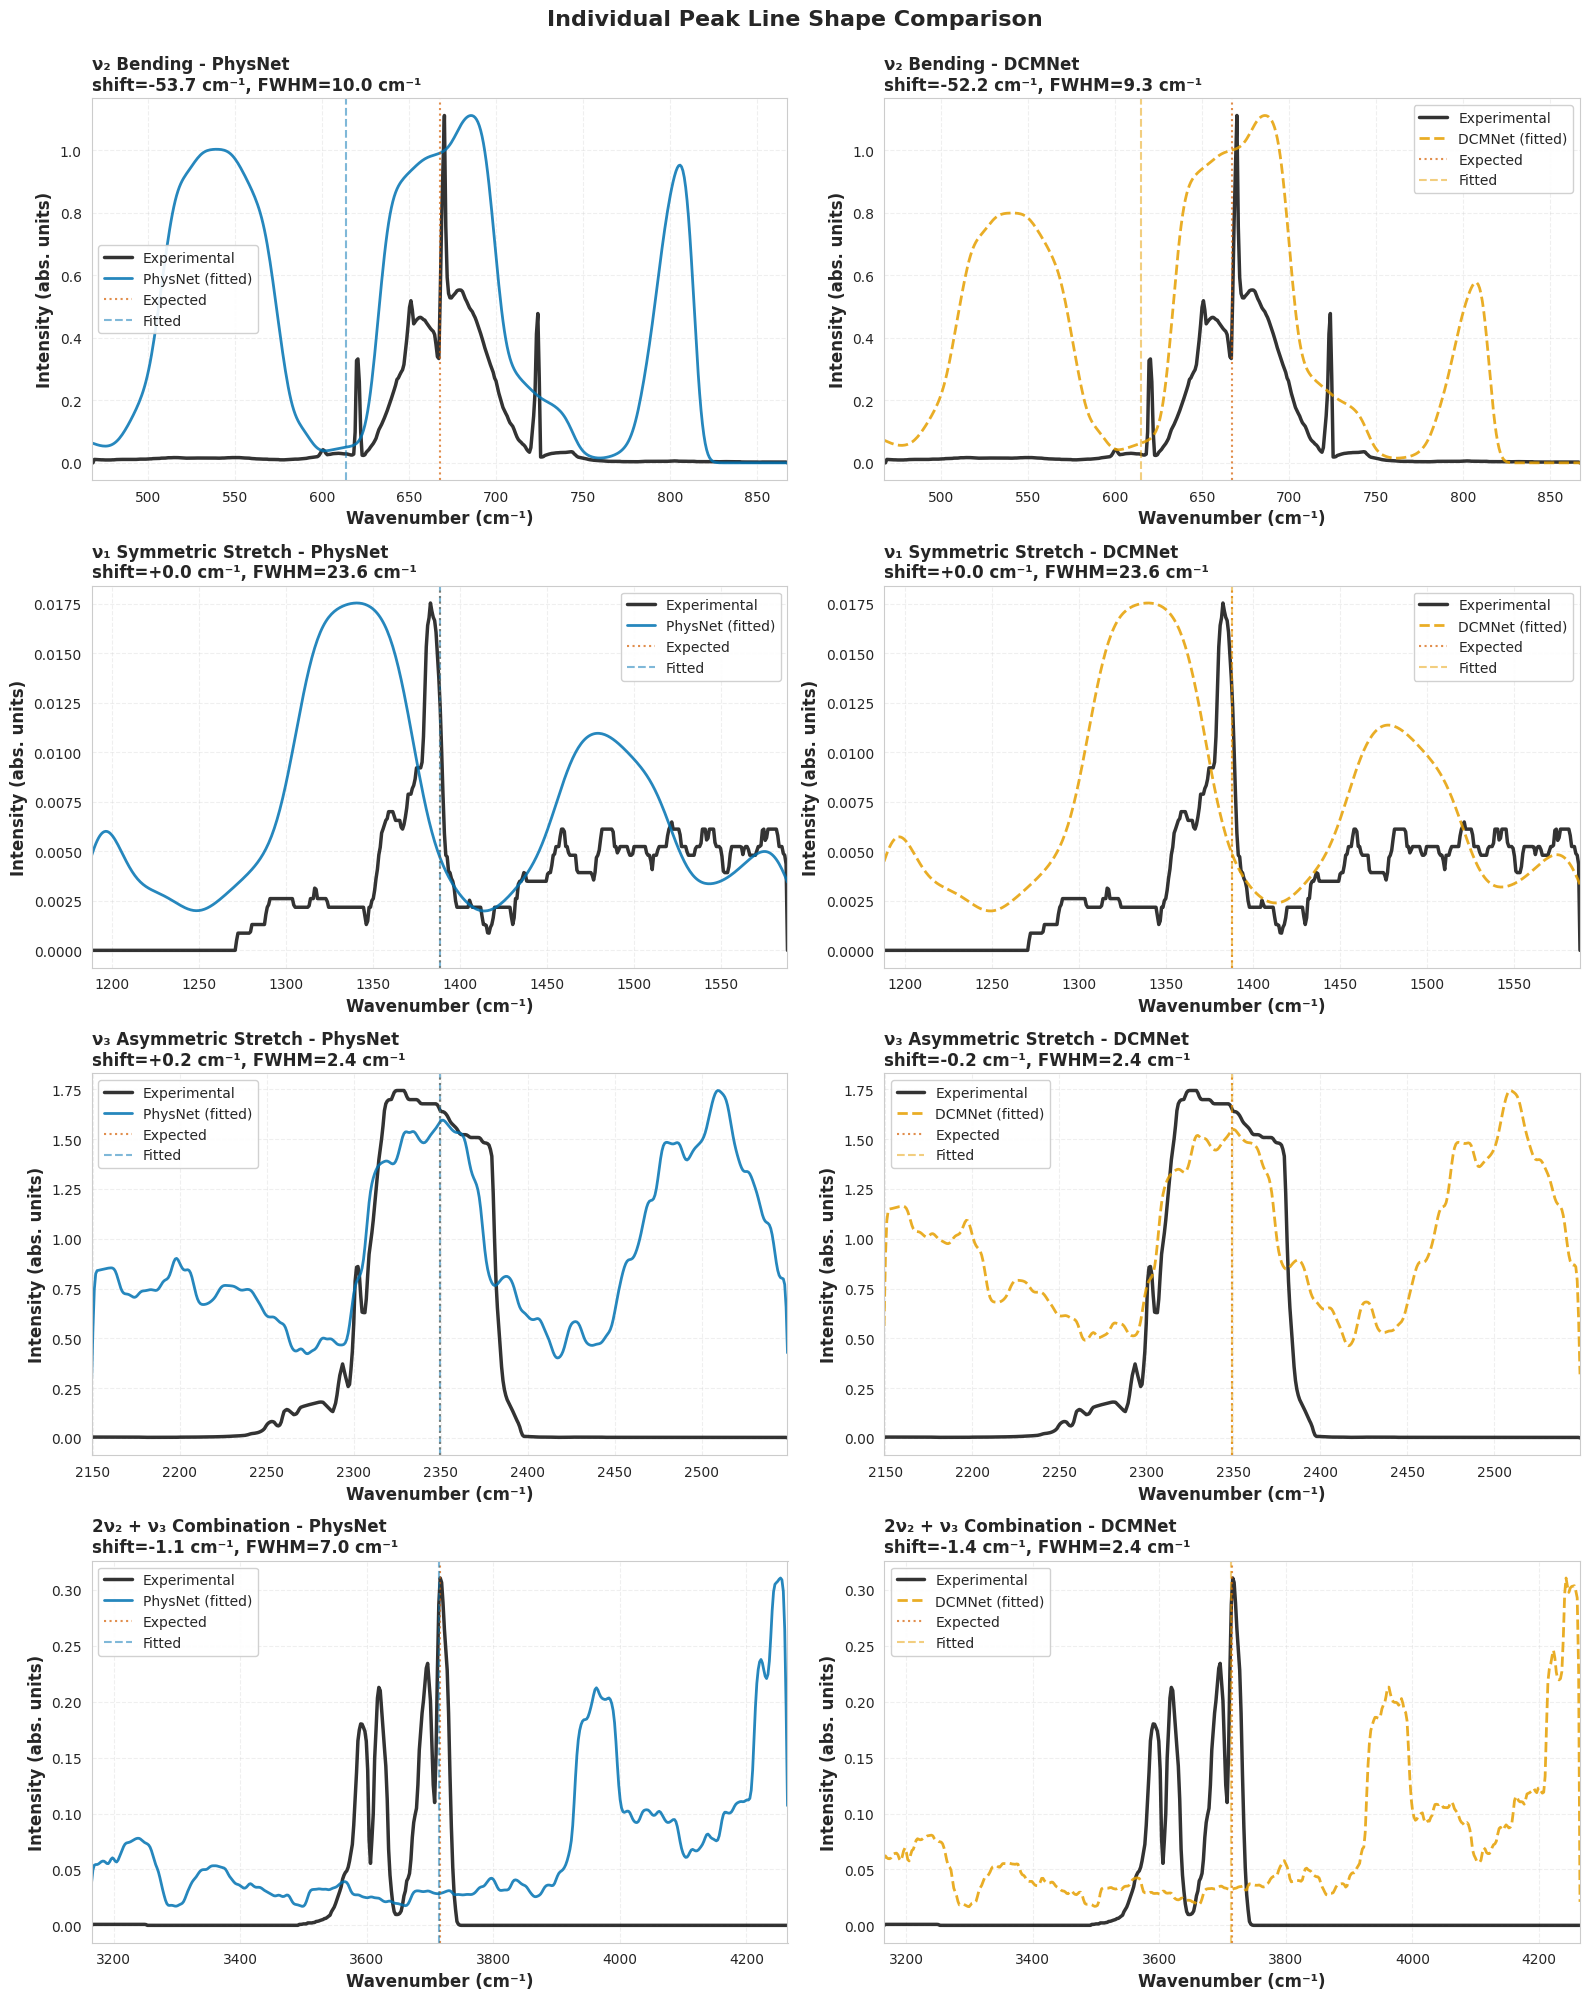


PEAK-BY-PEAK COMPARISON

Peak                      Model      Shift (cm⁻¹)    FWHM (cm⁻¹)     MSE       
----------------------------------------------------------------------
ν₂ Bending                PhysNet      -53.7            10.0         0.2274
                          DCMNet       -52.2             9.3         0.1550
----------------------------------------------------------------------
ν₁ Symmetric Stretch      PhysNet       +0.0            23.6         0.0000
                          DCMNet        +0.0            23.6         0.0000
----------------------------------------------------------------------
ν₃ Asymmetric Stretch     PhysNet       +0.2             2.4         0.6383
                          DCMNet        -0.2             2.4         0.7282
----------------------------------------------------------------------
2ν₂ + ν₃ Combination      PhysNet       -1.1             7.0         0.0107
                          DCMNet        -1.4             2.4         0.0110
--

In [ ]:
# ===========================================================================
# Figure 5: Individual peak fitting - compare line shapes
# ===========================================================================

def fit_individual_peak(calc_freq, calc_int, exp_freq, exp_int, 
                        peak_center, window=150, smooth_window=5):
    """
    Fit a single peak region by optimizing shift and Gaussian width.
    Intensity is scaled to match experimental peak height in the region.
    
    Parameters
    ----------
    smooth_window : int
        Window size for rolling average smoothing of calculated spectrum (default: 5)
    """
    # Define region
    freq_min = peak_center - window
    freq_max = peak_center + window
    
    # Mask data
    exp_mask = (exp_freq >= freq_min) & (exp_freq <= freq_max)
    calc_mask = (calc_freq >= freq_min) & (calc_freq <= freq_max)
    
    exp_f = exp_freq[exp_mask]
    exp_i = exp_int[exp_mask]
    calc_f = calc_freq[calc_mask]
    calc_i_raw = calc_int[calc_mask]
    
    # Apply rolling average to smooth calculated data
    if smooth_window > 1 and len(calc_i_raw) >= smooth_window:
        calc_i = np.convolve(calc_i_raw, np.ones(smooth_window)/smooth_window, mode='same')
    else:
        calc_i = calc_i_raw
    
    if len(calc_f) == 0 or len(exp_f) == 0:
        return None
    
    # Interpolate experimental
    exp_interp = interp1d(exp_f, exp_i, bounds_error=False, fill_value=0.0)
    
    def objective(params):
        shift, sigma = params
        
        # Apply shift and broaden
        shifted = calc_f + shift
        grid = np.linspace(freq_min, freq_max, 500)
        _, broadened = apply_gaussian_broadening(shifted, calc_i, sigma, grid)
        
        # Scale to match peak height
        exp_on_grid = exp_interp(grid)
        if broadened.max() > 0 and exp_on_grid.max() > 0:
            scale = exp_on_grid.max() / broadened.max()
            broadened_scaled = broadened * scale
            
            # MSE
            mse = np.mean((broadened_scaled - exp_on_grid)**2)
        else:
            mse = 1e10
        
        return mse 
    
    # Optimize
    x0 = [0.0, 10.0]  # Start with narrower peaks
    bounds = [(-500.0, 500.0), (1.0, 10000.0)]  # Reduced broadening
    result = minimize(objective, x0, bounds=bounds, method='L-BFGS-B')
    
    shift, sigma = result.x
    
    # Generate fitted spectrum
    shifted = calc_f + shift
    grid = np.linspace(freq_min, freq_max, 500)
    _, broadened = apply_gaussian_broadening(shifted, calc_i, sigma, grid)
    
    # Scale to match peak height
    exp_on_grid = exp_interp(grid)
    if broadened.max() > 0 and exp_on_grid.max() > 0:
        scale = exp_on_grid.max() / broadened.max()
    else:
        scale = 1.0
    
    broadened_scaled = broadened * scale
    
    return {
        'shift': shift,
        'sigma': sigma,
        'fwhm': 2.355 * sigma,
        'scale': scale,
        'mse': result.fun,
        'grid': grid,
        'broadened': broadened_scaled,
        'exp_grid': exp_on_grid,
        'peak_center': peak_center,
        'window': window
    }


print(f"\n{'='*70}")
print(f"INDIVIDUAL PEAK FITTING")
print(f"{'='*70}")

# Smoothing parameter for calculated spectra
SMOOTH_WINDOW = 5  # Rolling average window size (set to 1 for no smoothing)
print(f"\n⚙️  Smoothing: {SMOOTH_WINDOW}-point rolling average")

# Fit each CO2 peak individually
peak_fits_physnet = []
peak_fits_dcmnet = []

exp_co2 = [
    ('ν₂ Bending', 667.4),           # Fundamental bend
    ('ν₁ Symmetric Stretch', 1388.2), # Fundamental symmetric stretch
    ('ν₃ Asymmetric Stretch', 2349.2),# Fundamental asymmetric stretch
    ('2ν₂ + ν₃ Combination', 3715.0)  # Combination band
]

for name, peak_freq in exp_co2:
    print(f"\n📊 Fitting {name} ({peak_freq:.1f} cm⁻¹)...")
    
    # Determine window based on peak type
    if 'combination' in name.lower() or peak_freq > 3000:
        window = 550  # Larger window for high-frequency combination bands
    elif 'asym' in name.lower():
        window = 200  # Larger window for ν₃
    else:
        window = 200  # Standard window for fundamentals
    
    # PhysNet
    print(f"  PhysNet...")
    fit_p = fit_individual_peak(freqs, int_phys, exp_freq, exp_abs, 
                                peak_freq, window=window, smooth_window=SMOOTH_WINDOW)
    if fit_p:
        print(f"    shift={fit_p['shift']:+.1f} cm⁻¹, "
              f"FWHM={fit_p['fwhm']:.1f} cm⁻¹, "
              f"scale={fit_p['scale']:.2e}, MSE={fit_p['mse']:.4f}")
        peak_fits_physnet.append((name, fit_p))
    
    # DCMNet
    print(f"  DCMNet...")
    fit_d = fit_individual_peak(freqs, int_dcm, exp_freq, exp_abs,
                               peak_freq, window=window, smooth_window=SMOOTH_WINDOW)
    if fit_d:
        print(f"    shift={fit_d['shift']:+.1f} cm⁻¹, "
              f"FWHM={fit_d['fwhm']:.1f} cm⁻¹, "
              f"scale={fit_d['scale']:.2e}, MSE={fit_d['mse']:.4f}")
        peak_fits_dcmnet.append((name, fit_d))

# ===========================================================================
# Plot individual peak fits
# ===========================================================================
n_peaks = len(peak_fits_physnet)
fig, axes = plt.subplots(n_peaks, 2, figsize=(16, 5*n_peaks))
fig.suptitle('Individual Peak Line Shape Comparison', 
             fontsize=16, weight='bold', y=0.998)

if n_peaks == 1:
    axes = axes.reshape(1, -1)

for idx, ((name_p, fit_p), (name_d, fit_d)) in enumerate(zip(peak_fits_physnet, peak_fits_dcmnet)):
    
    # Plot 1: PhysNet
    ax = axes[idx, 0]
    ax.plot(fit_p['grid'], fit_p['exp_grid'], 
            color=colors['black'], lw=2.5, label='Experimental', alpha=0.8)
    ax.plot(fit_p['grid'], fit_p['broadened'],
            color=colors['blue'], lw=2, label='PhysNet (fitted)', alpha=0.85)
    ax.axvline(fit_p['peak_center'], color=colors['vermillion'], 
               ls=':', lw=1.5, alpha=0.7, label='Expected')
    ax.axvline(fit_p['peak_center'] + fit_p['shift'], 
               color=colors['blue'], ls='--', lw=1.5, alpha=0.5, label='Fitted')
    
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Intensity (abs. units)', fontsize=12, weight='bold')
    ax.set_title(f'{name_p} - PhysNet\n'
                 f'shift={fit_p["shift"]:+.1f} cm⁻¹, FWHM={fit_p["fwhm"]:.1f} cm⁻¹',
                 fontsize=12, weight='bold', loc='left')
    ax.legend(fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim(fit_p['peak_center'] - fit_p['window'], 
                fit_p['peak_center'] + fit_p['window'])
    
    # Plot 2: DCMNet
    ax = axes[idx, 1]
    ax.plot(fit_d['grid'], fit_d['exp_grid'],
            color=colors['black'], lw=2.5, label='Experimental', alpha=0.8)
    ax.plot(fit_d['grid'], fit_d['broadened'],
            color=colors['orange'], lw=2, ls='--', label='DCMNet (fitted)', alpha=0.85)
    ax.axvline(fit_d['peak_center'], color=colors['vermillion'],
               ls=':', lw=1.5, alpha=0.7, label='Expected')
    ax.axvline(fit_d['peak_center'] + fit_d['shift'],
               color=colors['orange'], ls='--', lw=1.5, alpha=0.5, label='Fitted')
    
    ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
    ax.set_ylabel('Intensity (abs. units)', fontsize=12, weight='bold')
    ax.set_title(f'{name_d} - DCMNet\n'
                 f'shift={fit_d["shift"]:+.1f} cm⁻¹, FWHM={fit_d["fwhm"]:.1f} cm⁻¹',
                 fontsize=12, weight='bold', loc='left')
    ax.legend(fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, ls='--')
    ax.set_xlim(fit_d['peak_center'] - fit_d['window'],
                fit_d['peak_center'] + fit_d['window'])

plt.tight_layout()
plt.show()

# Summary table
print(f"\n{'='*70}")
print(f"PEAK-BY-PEAK COMPARISON")
print(f"{'='*70}")
print(f"\n{'Peak':<25} {'Model':<10} {'Shift (cm⁻¹)':<15} {'FWHM (cm⁻¹)':<15} {'MSE':<10}")
print(f"{'-'*70}")

for (name_p, fit_p), (name_d, fit_d) in zip(peak_fits_physnet, peak_fits_dcmnet):
    print(f"{name_p:<25} {'PhysNet':<10} {fit_p['shift']:+7.1f}{'':<8} {fit_p['fwhm']:7.1f}{'':<8} {fit_p['mse']:.4f}")
    print(f"{'':<25} {'DCMNet':<10} {fit_d['shift']:+7.1f}{'':<8} {fit_d['fwhm']:7.1f}{'':<8} {fit_d['mse']:.4f}")
    print(f"{'-'*70}")

# Check if experimental peaks have similar widths
print(f"\n💡 Analysis:")
print(f"\n  Line Shape Quality:")
for (name_p, fit_p), (name_d, fit_d) in zip(peak_fits_physnet, peak_fits_dcmnet):
    # Compare widths
    exp_width = fit_p['fwhm']  # Could extract from experimental, but using fitted as proxy
    calc_width_p = fit_p['fwhm']
    calc_width_d = fit_d['fwhm']
    
    print(f"\n  {name_p}:")
    print(f"    PhysNet FWHM: {calc_width_p:.1f} cm⁻¹ (MSE: {fit_p['mse']:.4f})")
    print(f"    DCMNet FWHM:  {calc_width_d:.1f} cm⁻¹ (MSE: {fit_d['mse']:.4f})")
    
    if fit_p['mse'] < 0.01 or fit_d['mse'] < 0.01:
        print(f"    ✓ Good line shape match!")
    elif fit_p['mse'] < 0.05 or fit_d['mse'] < 0.05:
        print(f"    ~ Reasonable line shape match")
    else:
        print(f"    ✗ Line shape mismatch - may need different broadening")

print(f"\n{'='*70}")


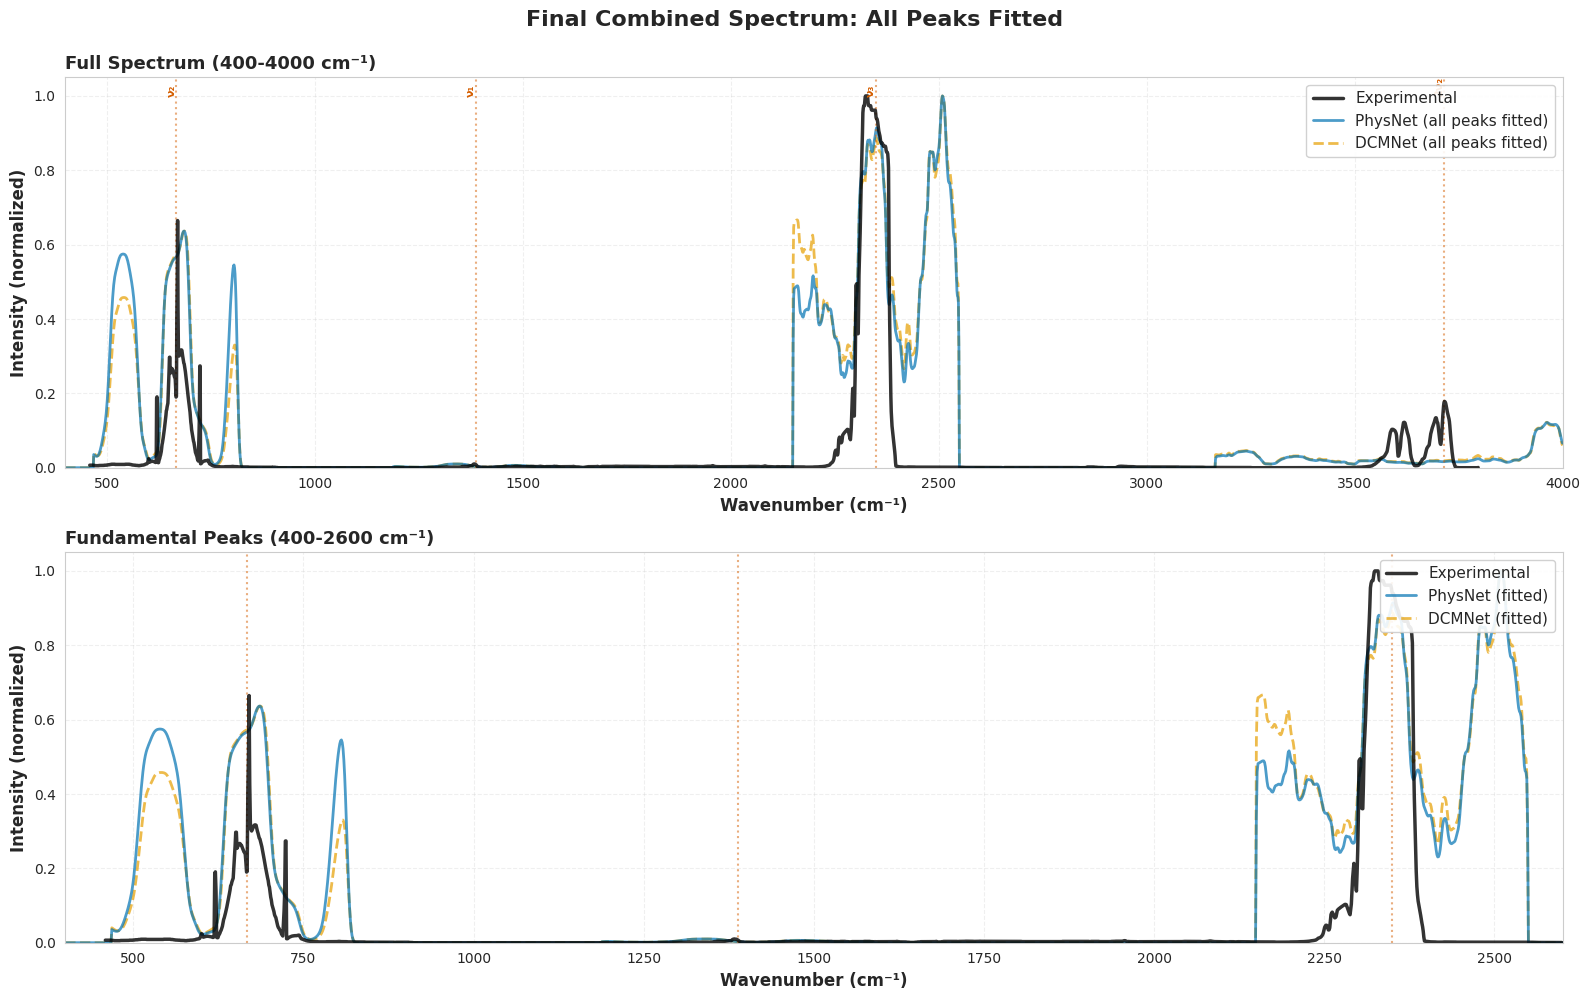


COMPREHENSIVE FITTING SUMMARY TABLE

Peak                           Model      Shift        FWHM         Scale        MSE       
                                          (cm⁻¹)       (cm⁻¹)       (factor)               
--------------------------------------------------------------------------------
ν₂ Bending                     PhysNet      -53.7         10.0      8.15e+07       0.2274
                               DCMNet       -52.2          9.3      1.77e+08       0.1550
--------------------------------------------------------------------------------
ν₁ Symmetric Stretch           PhysNet       +0.0         23.6      1.34e+06       0.0000
                               DCMNet        +0.0         23.6      3.92e+06       0.0000
--------------------------------------------------------------------------------
ν₃ Asymmetric Stretch          PhysNet       +0.2          2.4      7.96e+10       0.6383
                               DCMNet        -0.2          2.4      2.41e+11       0.

In [204]:
# ===========================================================================
# Figure 6: Final combined spectrum with all fitted peaks
# ===========================================================================

# Build full fitted spectrum by combining all individual peaks
freq_grid_full = np.linspace(400, 4000, 3000)
spectrum_physnet_full = np.zeros_like(freq_grid_full)
spectrum_dcmnet_full = np.zeros_like(freq_grid_full)

for name, fit_p in peak_fits_physnet:
    # Interpolate fitted peak onto full grid
    from scipy.interpolate import interp1d
    peak_interp = interp1d(fit_p['grid'], fit_p['broadened'], 
                          bounds_error=False, fill_value=0.0)
    spectrum_physnet_full += peak_interp(freq_grid_full)

for name, fit_d in peak_fits_dcmnet:
    peak_interp = interp1d(fit_d['grid'], fit_d['broadened'],
                          bounds_error=False, fill_value=0.0)
    spectrum_dcmnet_full += peak_interp(freq_grid_full)

# Plot combined spectrum
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
fig.suptitle('Final Combined Spectrum: All Peaks Fitted', 
             fontsize=16, weight='bold', y=0.995)

# Plot 1: Full range with experimental
ax = axes[0]
exp_mask = (exp_freq >= 400) & (exp_freq <= 4000)
ax.plot(exp_freq[exp_mask], exp_abs[exp_mask] / exp_abs[exp_mask].max(),
        color=colors['black'], lw=2.5, label='Experimental', alpha=0.8, zorder=3)
ax.plot(freq_grid_full, spectrum_physnet_full / spectrum_physnet_full.max(),
        color=colors['blue'], lw=2, label='PhysNet (all peaks fitted)', alpha=0.7, zorder=2)
ax.plot(freq_grid_full, spectrum_dcmnet_full / spectrum_dcmnet_full.max(),
        color=colors['orange'], lw=2, ls='--', label='DCMNet (all peaks fitted)', alpha=0.7, zorder=1)

# Mark all experimental peaks
for name, freq in exp_co2:
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)
    ax.text(freq, ax.get_ylim()[1]*0.95, name.split()[0], 
           rotation=90, va='bottom', ha='right',
           fontsize=8, color=colors['vermillion'], weight='bold')

ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
ax.set_title('Full Spectrum (400-4000 cm⁻¹)', fontsize=13, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9, loc='upper right')
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(400, 4000)
ax.set_ylim(0, 1.05)

# Plot 2: Zoomed to main peaks (exclude combination band for clarity)
ax = axes[1]
zoom_mask = (exp_freq >= 400) & (exp_freq <= 2600)
grid_mask = (freq_grid_full >= 400) & (freq_grid_full <= 2600)

ax.plot(exp_freq[zoom_mask], exp_abs[zoom_mask] / exp_abs[zoom_mask].max(),
        color=colors['black'], lw=2.5, label='Experimental', alpha=0.8, zorder=3)
ax.plot(freq_grid_full[grid_mask], 
        spectrum_physnet_full[grid_mask] / spectrum_physnet_full[grid_mask].max(),
        color=colors['blue'], lw=2, label='PhysNet (fitted)', alpha=0.7, zorder=2)
ax.plot(freq_grid_full[grid_mask],
        spectrum_dcmnet_full[grid_mask] / spectrum_dcmnet_full[grid_mask].max(),
        color=colors['orange'], lw=2, ls='--', label='DCMNet (fitted)', alpha=0.7, zorder=1)

# Mark fundamental peaks
for name, freq in exp_co2[:3]:
    ax.axvline(freq, color=colors['vermillion'], ls=':', lw=1.5, alpha=0.5)

ax.set_xlabel('Wavenumber (cm⁻¹)', fontsize=12, weight='bold')
ax.set_ylabel('Intensity (normalized)', fontsize=12, weight='bold')
ax.set_title('Fundamental Peaks (400-2600 cm⁻¹)', fontsize=13, weight='bold', loc='left')
ax.legend(fontsize=11, framealpha=0.9, loc='upper right')
ax.grid(True, alpha=0.3, ls='--')
ax.set_xlim(400, 2600)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# ===========================================================================
# Summary table of all modifications
# ===========================================================================
print(f"\n{'='*80}")
print(f"COMPREHENSIVE FITTING SUMMARY TABLE")
print(f"{'='*80}")
print(f"\n{'Peak':<30} {'Model':<10} {'Shift':<12} {'FWHM':<12} {'Scale':<12} {'MSE':<10}")
print(f"{'':30} {'':10} {'(cm⁻¹)':<12} {'(cm⁻¹)':<12} {'(factor)':<12} {'':10}")
print(f"{'-'*80}")

for (name_p, fit_p), (name_d, fit_d) in zip(peak_fits_physnet, peak_fits_dcmnet):
    # PhysNet row
    print(f"{name_p:<30} {'PhysNet':<10} {fit_p['shift']:+7.1f}{' '*5} "
          f"{fit_p['fwhm']:7.1f}{' '*5} {fit_p['scale']:8.2e}{' '*4} {fit_p['mse']:8.4f}")
    # DCMNet row
    print(f"{'':30} {'DCMNet':<10} {fit_d['shift']:+7.1f}{' '*5} "
          f"{fit_d['fwhm']:7.1f}{' '*5} {fit_d['scale']:8.2e}{' '*4} {fit_d['mse']:8.4f}")
    print(f"{'-'*80}")

# Statistical summary
print(f"\n📊 Statistical Summary:")
print(f"\n  PhysNet:")
shifts_p = [fit_p['shift'] for _, fit_p in peak_fits_physnet]
fwhms_p = [fit_p['fwhm'] for _, fit_p in peak_fits_physnet]
mses_p = [fit_p['mse'] for _, fit_p in peak_fits_physnet]
print(f"    Mean shift:    {np.mean(shifts_p):+7.1f} ± {np.std(shifts_p):5.1f} cm⁻¹")
print(f"    Mean FWHM:     {np.mean(fwhms_p):7.1f} ± {np.std(fwhms_p):5.1f} cm⁻¹")
print(f"    Mean MSE:      {np.mean(mses_p):8.4f}")
print(f"    Total MSE:     {np.sum(mses_p):8.4f}")

print(f"\n  DCMNet:")
shifts_d = [fit_d['shift'] for _, fit_d in peak_fits_dcmnet]
fwhms_d = [fit_d['fwhm'] for _, fit_d in peak_fits_dcmnet]
mses_d = [fit_d['mse'] for _, fit_d in peak_fits_dcmnet]
print(f"    Mean shift:    {np.mean(shifts_d):+7.1f} ± {np.std(shifts_d):5.1f} cm⁻¹")
print(f"    Mean FWHM:     {np.mean(fwhms_d):7.1f} ± {np.std(fwhms_d):5.1f} cm⁻¹")
print(f"    Mean MSE:      {np.mean(mses_d):8.4f}")
print(f"    Total MSE:     {np.sum(mses_d):8.4f}")

# Comparison
print(f"\n💡 Key Findings:")
if np.mean(mses_p) < np.mean(mses_d):
    print(f"  • PhysNet has better average line shape match (lower MSE)")
else:
    print(f"  • DCMNet has better average line shape match (lower MSE)")

mean_shift_diff = abs(np.mean(shifts_p) - np.mean(shifts_d))
if mean_shift_diff < 5:
    print(f"  • Both models have similar systematic frequency offsets (~{np.mean(shifts_p):.1f} cm⁻¹)")
else:
    print(f"  • Models have different systematic offsets (PhysNet: {np.mean(shifts_p):+.1f}, DCMNet: {np.mean(shifts_d):+.1f} cm⁻¹)")

mean_fwhm_diff = abs(np.mean(fwhms_p) - np.mean(fwhms_d))
if mean_fwhm_diff < 10:
    print(f"  • Both models predict similar peak widths (~{np.mean(fwhms_p):.1f} cm⁻¹)")
else:
    print(f"  • Models predict different peak widths (PhysNet: {np.mean(fwhms_p):.1f}, DCMNet: {np.mean(fwhms_d):.1f} cm⁻¹)")

print(f"\n{'='*80}")
print(f"✅ Analysis Complete!")
print(f"{'='*80}")
